In [48]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 500)
%matplotlib inline

In [10]:
df.shape

(26155, 12)

In [14]:
df = pd.read_csv('../dados/bem_candidato_2016_CE.txt', 
                 encoding='ISO-8859-1', 
                 sep=';', 
                 names=["DATA_GERACAO", "HORA_GERACAO", "ANO_ELEICAO", "DESCRICAO_ELEICAO", 
                         "SIGLA_UF", "SQ_CANDIDATO", "CD_TIPO_BEM_CANDIDATO", "TIPO_BEM_CANDIDATO", 
                         "DS_TIPO_BEM_CANDIDATO", "VALOR_BEM", "DATA_ULTIMA_ATUALIZACAO", 
                         "HORA_ULTIMA_ATUALIZACAO"],
                 usecols=["SQ_CANDIDATO", "TIPO_BEM_CANDIDATO", "DS_TIPO_BEM_CANDIDATO", "VALOR_BEM"])

In [25]:
df.sample(1).T

,3897
SQ_CANDIDATO,60000003125
TIPO_BEM_CANDIDATO,Galpão
DS_TIPO_BEM_CANDIDATO,"01 GALPAO SITUADO NA RUA LAMARTINE NOGUEIRA,1568 - SAO FRANCISCO- VIÇOSA DO CEARA"
VALOR_BEM,17598.7


In [31]:
df.VALOR_BEM.describe().apply(lambda x: "{:,}".format(x))

count               26,155.0
mean     64,866.171179889076
std      267,550.16069688706
min                     0.01
25%                  6,000.0
50%                 20,000.0
75%                57,044.44
max             20,000,000.0
Name: VALOR_BEM, dtype: object

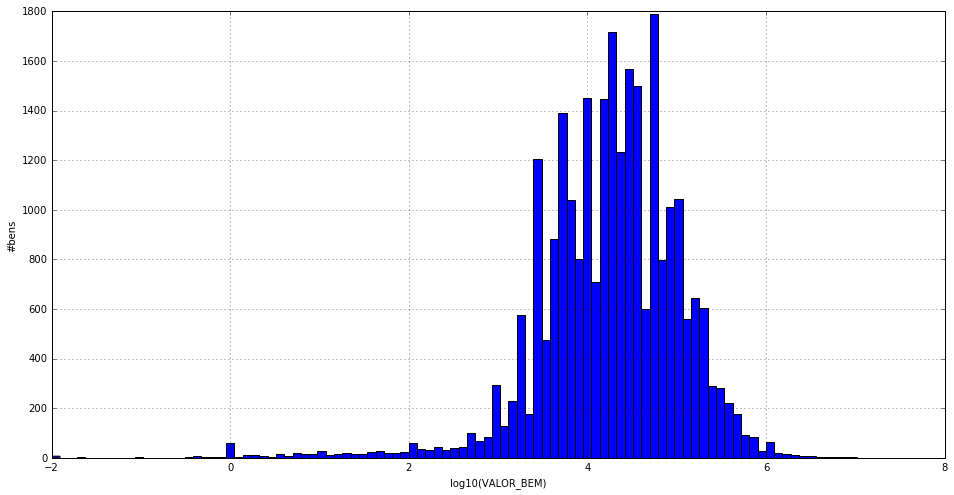

In [56]:
ax = df.VALOR_BEM.apply(np.log10).hist(bins=100, figsize=(16, 8))
ax.set_xlabel('log10(VALOR_BEM)')
ax.set_ylabel('#bens')

In [70]:
df.groupby('TIPO_BEM_CANDIDATO').VALOR_BEM\
.apply(lambda x: pd.Series({'qtd':x.count(), 'min':x.min(), 'max':x.max(), 'mean':x.mean()}))\
.unstack()\
.applymap(lambda x: "{:}".format(x))

,max,mean,min,qtd
TIPO_BEM_CANDIDATO,,,,
Aeronave,28000.0,28000.0,28000.0,1.0
Apartamento,3620501.57,246284.52346853138,600.0,715.0
"Aplicação de renda fixa (CDB, RDB e outros)",2182486.0,63722.330458015254,1.14,262.0
Ações (inclusive as provenientes de linha telefônica),10092334.84,491430.7898305084,2.0,59.0
Bem relacionado com o exercício da atividade autônoma,600000.0,49496.08505747127,1000.0,87.0
Benfeitorias,643508.75,87994.6452,700.0,25.0
Caderneta de poupança,860000.0,18050.220677290843,0.01,753.0
Casa,6000000.0,112810.23508222394,0.01,3831.0
Construção,888260.0,144024.1781081081,15000.0,37.0
